# ДЗ 2: Статистические методы

Выполнила: Карнакова Ксения (@xenahkar)


---

## Задача 1

Из партии батареек с номинальным напряжением 12 В наугад выбрано семь штук. Согласно показаниям высокоточного вольтметра, фактически выдаваемое ими напряжение составило: 12,9; 11,6; 13,5; 13,9; 12,1; 11,9; 13,0 В соответственно. Можно ли считать, что среднее напряжение действительно равно 12 В?

---


### Решение
**Гипотезы:**

$$ H_0 : \mu = 12  $$
 $$ H_a : \mu \neq 12  $$

Буду использовать одновыборочный t-тест Стьюдента, чтобы проверить гипотезу о равенстве среднего значения.

Предпоссылки одновыборочного t-теста Стьюдента это:
1. **Нормальность распределения**. Нормальность распределения проверю с помощью теста Шапиро-Уилка, так как у нас всего 7 наблюдений (не буду надеяться на ЦПТ).

2. **Независимость наблюдений**. Независимость наблюдений соблюдается: одно наблюдение не влияет на другое.

In [ ]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

In [ ]:
# проверка на нормальность распределения
data = [12.9, 11.6, 13.5, 13.9, 12.1, 11.9, 13.0]
mu = 12.0
alpha = 0.05

statistic, pvalue = stats.shapiro(data)
print(f"Тест Шапиро-Уилка: statistic = {statistic:.4f}, p-value = {pvalue:.4f}")

Тест Шапиро-Уилка: statistic = 0.9462, p-value = 0.6946


`p value = 0.69` => нулевая гипотеза теста Шапиро-Уилка о нормальном распределении данных не отклоняется.

Все предпосылки t-теста Стьюдента выполняются.




In [ ]:
#  t-тест Стьюдента
t_statistic, p_value = stats.ttest_1samp(data, mu)
print(f't-statistic = {t_statistic:.4f}, p-value = {p_value:.4f}')

if p_value < alpha:
    print(f"На уровне значимости alpha = {alpha} отвергаем нулевую гипотезу: среднее значение отличается от 12 В.")
else:
    print(f"На уровне значимости alpha = {alpha} нет оснований отвергать нулевую гипотезу: среднее значение не отличается от 12 В.")

t-statistic = 2.1578, p-value = 0.0743
На уровне значимости alpha = 0.05 нет оснований отвергать нулевую гипотезу: среднее значение не отличается от 12 В.


**Вывод:** Поскольку `p-value=0.07`, то на уровне значимости `alpha = 0.05` нет оснований отвергать нулевую гипотезу о том, что среднее значение равно 12 В.

---


## Задача 2


Есть два различных метода определения процентного содержания жира в мясе. Доля жира для 10 образцов мяса была определена каждым из двух методов. Позволяют ли полученные результаты сделать вывод о том, что один метод даёт в среднем более высокие показания, чем другой?

| Образец |1 |2 |3 |4 |5 |6 |7 | 8 | 9 | 10  |
|---|---|---|---|---|---|---|---|---|---|---|
|Метод I|23,1|23,2|26,5|26,6|27,1|48,3|40,5|25,0|38,4|23,5|
|Метод II|22,7|23,6|27,1|27,4|27,4|46,8|40,4|24,9|38,1| 23,8|


---


### Решение

 Чтобы сделать вывод о том, что один метод дает в среднем более высокие показания, чем другой, можно попробовать использовать **t-тест для независимых выборок** (в итоге получилось, что нельзя).

- **Нулевая гипотеза**: Средние значения процентного содержания жира в методах I и II равны.
- **Альтернативная гипотеза**: Среднее значение процентного содержания жира в методе I отличается от содержания жира в методе II.


$$ H_0 : \mu_1 = \mu_2 $$
 $$ H_a : \mu_1 \neq \mu_2  $$


*Предпосылки теста:*

1. **Независимость наблюдений**: выполняется, так как наблюдения в одной группе не зависят от наблюдений в другой группе.

2. **Нормальность распределений**: так как в каждой группе по 10 наблюдений, проверю нормальность распределения значений тестом Шапиро-Уилка. Нулевая гипотеза в критерии Шапиро-Уилка: переменная распределена нормально.

3. **Гомогенность дисперсий**: проверю с помощью теста Левена. Нулевая гипотеза для этого критерия: дисперсии в двух выборках не имеют значимых различий. Если дисперсии значимо различаются, то тогда буду применять модифицированный t-тест (задав в `stats.ttest_ind` параметр `equal_var=False`).

In [ ]:
method_I = np.array([23.1, 23.2, 26.5, 26.6, 27.1, 48.3, 40.5, 25.0, 38.4, 23.5])
method_II = np.array([22.7, 23.6, 27.1, 27.4, 27.4, 46.8, 40.4, 24.9, 38.1, 23.8])
# проверка на нормальность распределения
shapiro_I = stats.shapiro(method_I)
shapiro_II = stats.shapiro(method_II)
print(f"Тест Шапиро-Уилка для процентного содержания жира в методе I: statistic = {shapiro_I.statistic:.4f}, p-value = {shapiro_I.pvalue:.4f}")
print(f"Тест Шапиро-Уилка для процентного содержания жира в методе II: statistic = {shapiro_II.statistic:.4f}, p-value = {shapiro_II.pvalue:.4f}")

# проверка гомогенности дисперсий
levene_test = stats.levene(method_I, method_II)
print(f"Тест Левена: statistic = {levene_test.statistic:.4f}, p-value = {levene_test.pvalue:.4f}")

Тест Шапиро-Уилка для процентного содержания жира в методе I: statistic = 0.7864, p-value = 0.0099
Тест Шапиро-Уилка для процентного содержания жира в методе II: statistic = 0.8127, p-value = 0.0207
Тест Левена: statistic = 0.0026, p-value = 0.9597


Предпосылка **нормальности распределения** данных процентного содержания жира в методе I не выполняется: нулевая гипотеза о нормальности распределения данных на уровне значимости `alpha = 0.05` отклоняется (`p-value = 0.01)`.

Предпосылка **нормальности распределения** данных процентного содержания жира в методе II не выполняется: нулевая гипотеза о нормальности распределения данных на уровне значимости `alpha = 0.05` отклоняется (`p-value = 0.02`).

Предпосылка **гомогенности дисперсий** выполняется: в тесте Левена получили значение `p-value = 0.96` => на уровне значимости `alpha = 0.05` принимается нулевая гиппотеза о том, что дисперсии в двух выборках не имеют значимых различий.

Таким образом, одна из предпосылок для применения t-теста для независимых выборок не выполняется. В этом случае можно использовать **непараметрический тест Манна-Уитни**, который требует только независимость наблюдений (эта предпосылка выполняется, так как наблюдения в одной группе не зависят от наблюдений в другой группе).


$$ X_1, \ldots, X_m - \text{наблюдения в методе I.} $$
$$ Y_1, \ldots, Y_m - \text{наблюдения в методе II.} $$
$$ F_X(t) = F_Y (t+ \theta) $$


- **Нулевая гипотеза**: Распределения значений процентного содержания жира в методах I и II идентичны, то есть нет значимого сдвига между ними.  
- **Альтернативная гипотеза**: Распределения значений процентного содержания жира в методах I и II различны, то есть существует значимый сдвиг между ними.


$$ H_0 : \theta = 0 $$
 $$ H_a : \theta \neq 0  $$




In [ ]:
u_statistic, p_value = stats.mannwhitneyu(method_I, method_II)
alpha = 0.05

print(f"Тест Манна-Уитни: U-statistic = {u_statistic:.4f}, p-value = {p_value:.4f}")

if p_value < alpha:
    print("Существует значимая разница между группами (отвергаем нулевую гипотезу в пользу альтернативной на уровне значимости 0.05.).")
else:
    print("Нет оснований для отвержения нулевой гипотезы на уровне значимости 0.05.")

Тест Манна-Уитни: U-statistic = 46.5000, p-value = 0.8205
Нет оснований для отвержения нулевой гипотезы на уровне значимости 0.05.


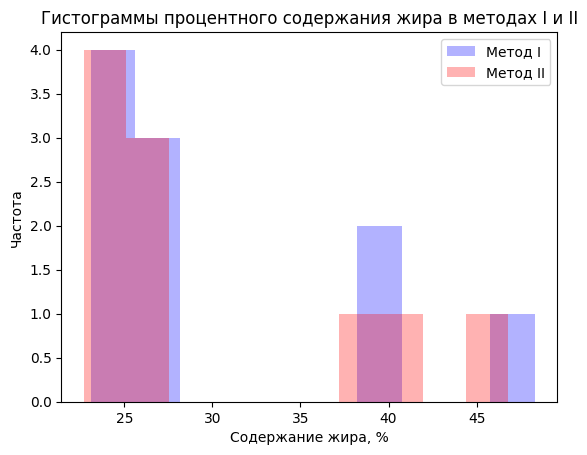

In [ ]:
plt.hist(method_I, alpha=0.3, label='Метод I', color='blue')
plt.hist(method_II, alpha=0.3, label='Метод II', color='red')
plt.title('Гистограммы процентного содержания жира в методах I и II')
plt.xlabel('Содержание жира, %')
plt.ylabel('Частота')
plt.legend()
plt.show()

**Вывод 1:** Полученное в тесте Манна-Уитни значение `p-value =  0.82` больше уровня значимости (`alpha = 0.05`). Мы принимаем нулевую гипотезу об отсутствии сдвига между группами. Это означает, что один метод не дает в среднем более высокие показатели по сравнению с другим.

Можно было подойти к решению задачи немного иначе: рассмотреть разность по каждому наблюдению в методе I и методе II и выполнить **одновыборочный t-тест**.


$$ H_0 : diff = 0  $$
 $$ H_a : diff \neq 0  $$

*Предпосылки теста:*

1. **Нормальность распределения**. Нормальность распределения проверю с помощью теста Шапиро-Уилка.

2. **Независимость наблюдений**. Независимость наблюдений соблюдается: одно наблюдение не влияет на другое.

In [ ]:
diff = method_I - method_II
diff

array([ 0.4, -0.4, -0.6, -0.8, -0.3,  1.5,  0.1,  0.1,  0.3, -0.3])

In [ ]:
statistic, pvalue = stats.shapiro(diff)
print(f"Тест Шапиро-Уилка: statistic = {statistic:.4f}, p-value = {pvalue:.4f}")

Тест Шапиро-Уилка: statistic = 0.8998, p-value = 0.2183


`p value = 0.22` => нулевая гипотеза теста Шапиро-Уилка о нормальном распределении разности каждого наблюдения не отклоняется.

Все предпосылки одновыборочного t-теста Стьюдента для разности наблюдений в методе 1 и методе 2 выполняются.

In [ ]:
#  одновыборочный t-тест Стьюдента
t_statistic, p_value = stats.ttest_1samp(diff, 0)
print(f't-statistic = {t_statistic}, p-value = {p_value}')

if p_value < alpha:
    print(f"На уровне значимости alpha = {alpha} отвергаем нулевую гипотезу: разность по каждому наблюдению отличается от 0.")
else:
    print(f"На уровне значимости alpha = {alpha} нет оснований отвергать нулевую гипотезу: разность по каждому наблюдению не отличается от 0.")

t-statistic = 1.7154884978678027e-15, p-value = 0.9999999999999987
На уровне значимости alpha = 0.05 нет оснований отвергать нулевую гипотезу: разность по каждому наблюдению не отличается от 0.


**Вывод 2:** Полученное с помощью одновыборочного t-теста значение `p-value =  1.00` больше уровня значимости (`alpha = 0.05`). Мы принимаем нулевую гипотезу о том, что разность по каждому наблюдению не отличается от 0. То есть, нет статистически значимых различий в средних показателях двух методов определения процентного содержания жира.

---


## Задача 3
Для проверки гипотезы о том, что жители городов имеют в среднем более высокое систолическое артериальное давление, чем жители сельской местности, было проведено обследование 10 горожан и 9 жителей села примерно одного возраста. Получены следующие данные об уровне давления для горожан: 132, 111, 119, 138, 200, 131, 138, 170, 159, 140; для селян: 115, 190, 127, 155, 148, 121, 116, 121, 197. Можно ли считать верной выдвинутую гипотезу на уровне значимости 0,05?

---

## Решение

Для проверки гипотезы о том, что жители городов имеют в среднем более высокое систолическое артериальное давление, чем жители сельской местности, можно использовать **односторонний t-тест для независимых выборок**.

- **Нулевая гипотеза**: Среднее систолическое артериальное давление у жителей городов равно среднему давлению у жителей сельской местности.

- **Альтернативная гипотеза**: Среднее систолическое артериальное давление у жителей городов выше среднего систолического артериального давления у жителей сельской местности.


$$ H_0 : \mu_1  = \mu_2 $$
 $$ H_a : \mu_1 > \mu_2  $$

где $$ \mu_1 - \text{среднее систолическое артериальное давление у жителей городов,}$$

$$ \mu_2 - \text{среднее систолическое артериальное давление у жителей сельской местности.}$$


*Предпосылки теста:*

1. **Независимость наблюдений**: выполняется, так как наблюдения в одной группе не зависят от наблюдений в другой группе.

2. **Нормальность распределений**: так как в одной группе 10 наблюдений, а в другой - 9 наблюдений, то проверю нормальность распределения значений тестом Шапиро-Уилка. Нулевая гипотеза в критерии Шапиро-Уилка: переменная распределена нормально.

3. **Гомогенность дисперсий**: проверю с помощью теста Левена. Нулевая гипотеза для этого критерия звучит так: дисперсии в двух выборках не имеют значимых различий. Если дисперсии значимо различаются, то тогда буду применять модифицированный t-тест (задав в `stats.ttest_ind` параметр `equal_var=False`).

In [ ]:
urban = [132, 111, 119, 138, 200, 131, 138, 170, 159, 140]
rural  = [115, 190, 127, 155, 148, 121, 116, 121, 197]

# проверка на нормальность распределения
shapiro_I = stats.shapiro(urban)
shapiro_II = stats.shapiro(rural)
print(f"Тест Шапиро-Уилка для городского населения: statistic = {shapiro_I.statistic:.4f}, p-value = {shapiro_I.pvalue:.4f}")
print(f"Тест Шапиро-Уилка для сельского населения: statistic = {shapiro_II.statistic:.4f}, p-value = {shapiro_II.pvalue:.4f}")

# проверка гомогенности дисперсий
levene_test = stats.levene(urban, rural)
print(f"Тест Левена: statistic = {levene_test.statistic:.4f}, p-value = {levene_test.pvalue:.4f}")

Тест Шапиро-Уилка для городского населения: statistic = 0.9101, p-value = 0.2814
Тест Шапиро-Уилка для сельского населения: statistic = 0.8287, p-value = 0.0431
Тест Левена: statistic = 0.3975, p-value = 0.5368


Предпосылка **нормальности распределения** данных городского населения выполняется: нулевая гипотеза о нормальности распределения данных на уровне значимости `alpha = 0.05` не отклоняется (`p-value = 0.28)`.

Предпосылка **нормальности распределения** данных сельского населения не выполняется: нулевая гипотеза о нормальности распределения данных  на уровне значимости `alpha = 0.05` отклоняется (`p-value = 0.04`).

Предпосылка **гомогенности дисперсий** выполняется: в тесте Левена получили значение `p-value = 0.54`  => на уровне значимости `alpha = 0.05` принимается нулевая гиппотеза о том, что дисперсии в двух выборках не имеют значимых различий.

Воспользуюсь t-тестом, учитывая, что результаты могут быть менее надежными из-за нарушения предположения о нормальности распределения давления сельского населения.

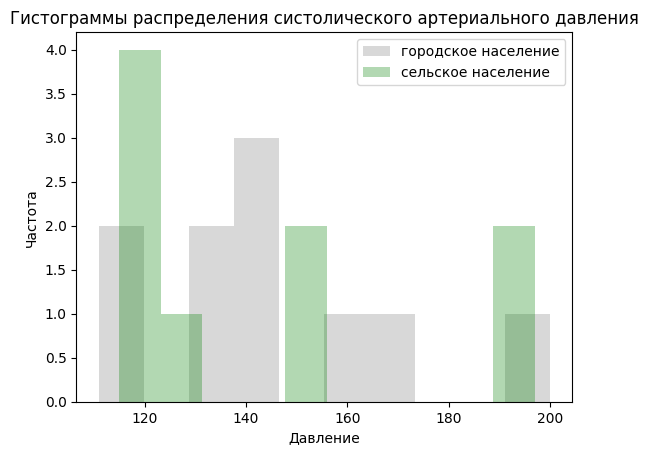

In [ ]:
plt.hist(urban, alpha=0.3, label='городское население', color='grey')
plt.hist(rural, alpha=0.3, label='сельское население', color='green')
plt.title('Гистограммы распределения систолического артериального давления')
plt.xlabel('Давление')
plt.ylabel('Частота')
plt.legend()
plt.show()

In [ ]:
# односторонний t-тест
t_statistic, p_value = stats.ttest_ind(urban, rural, alternative='greater')
alpha = 0.05
print(f't-statistic = {t_statistic:.4f}, p-value = {p_value:.4f}')

# Проверка гипотезы
if p_value < alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной на уровне значимости 0.05.")
else:
    print("На уровне значимости 0.05 принимаем нулевую гипотезу о равенстве средних давлений у жителей города и сельской местности.")

t-statistic = 0.0352, p-value = 0.4862
На уровне значимости 0.05 принимаем нулевую гипотезу о равенстве средних давлений у жителей города и сельской местности.


**Вывод 1:** На уровне значимости 0.05 нет оснований отвергать нулевую гипотезу о равенстве средних давлений у жителей города и сельской местности. Среднее систолическое артериальное давление горожан равно среднему систолическому артериальному давлению у сельских жителей.

Поскольку нормальность распределения нарушена для сельских жителей, проведу **непараметрический тест Манна-Уитни**, который требует только независимость наблюдений (эта предпосылка выполняется, так как наблюдения в одной группе не зависят от наблюдений в другой группе).


$$ X_1, \ldots, X_m - \text{наблюдения у городского населения} $$
$$ Y_1, \ldots, Y_n - \text{наблюдения у сельского населения} $$
$$ F_X(t+ \theta) = F_Y (t) $$


- **Нулевая гипотеза**: Распределение давления горожан правно распределению давления сельского населения, то есть нет значимого сдвига между ними.  
- **Альтернативная гипотеза**:  Распределение давления горожан сдвинуто вправо относительно сельского населения, то есть существует значимый сдвиг между ними.


$$ H_0 : \theta = 0 $$
 $$ H_a : \theta  > 0  $$


In [ ]:
# Нулевая гипотеза: Распределение давления горожан правно распределению давления сельского населения (theta = 0).
# Альтернатиная гипотеза: Распределение давления горожан сдвинуто вправо относительно сельского населения (theta > 0).

u_statistic, p_value = stats.mannwhitneyu(urban, rural, alternative='greater')
alpha = 0.05

print(f"Тест Манна-Уитни: U-statistic = {u_statistic:.4f}, p-value = {p_value:.4f}")

if p_value < alpha:
    print("Отвергаем нулевую гипотезу в пользу альтернативной на уровне значимости 0.05")
else:
    print("Нет оснований для отвержения нулевой гипотезы на уровне значимости 0.05.")

Тест Манна-Уитни: U-statistic = 50.0000, p-value = 0.3565
Нет оснований для отвержения нулевой гипотезы на уровне значимости 0.05.


**Вывод 2:** На уровне значимости 0.05 нет оснований отвергать нулевую гипотезу (theta = 0, сдвига нет). Результаты параметрического и непараметрического тестов согласуются. Нет достаточных оснований утверждать, что среднее систолическое артериальное давление горожан выше, чем у сельских жителей. Среднее систолическое артериальное давление горожан равно среднему систолическому артериальному давлению у сельских жителей.

---


## Задача 4
Известно, что 52% новорождённых детей — мальчики, а 48% — девочки. В случайной выборке из 5 000 человек в возрасте от 30 до 60 лет мужчин оказалось 2 500. Можно ли на уровне значимости 0,05 считать, основываясь на этих данных, что смертность среди мужчин и женщин одинакова?

---

### Решение

Смертность среди мужчин и женщин будет одинакова, если доля мужчин в возрасте от 30 до 60 лет будет равна доле родившихся мальчиков.

**Гипотезы:**

**Нулевая гипотеза:** Доля мужчин в выборке возрастной группы от 30 до 60 лет совпадает с долей новорожденных мальчиков.

**Альтернативная гипотеза:** Доля мужчин в выборке возрастной группы от 30 до 60 лет не совпадает с долей новорожденных мальчиков.


$$ H_0 : p = 0.52 $$
 $$ H_a : p \neq 052  $$

 Для проверки этих гипотез буду использовать биномиальный тест.


In [ ]:
n = 5000 # общее количество в выборке
k = 2500 # наблюдаемое количество мужчин
p = 0.52 # ожидаемая доля мужчин

stats.binomtest(k, n, p)

BinomTestResult(k=2500, n=5000, alternative='two-sided', statistic=0.5, pvalue=0.0048495021595452836)


**Вывод:**

Полученное значение p-value < 0.05 => на уровне значимости `alpha=0.05` нулевая гипотеза отвергается в пользу альтернативной: доля мужчин в выборке возрастной группы от 30 до 60 лет не совпадает с долей новорожденных мальчиков.

 То есть, на уровне значимости `alpha=0.05` мы можем считать, что смертность среди мужчин и женщин в возрасте от 30 до 60 лет **различается**.


---
## Задача 5

В первом эксперименте для сравнения двух средних X1=17, X2=16 применялся t-критерий Стьюдента, и эти различия оказались значимы (p = 0, 001).

Во втором исследовании, также при помощи t - критерия, сравнивались два средних X1=17, X2=36, и эти различия не значимы при p = 0,8. В чем может быть причина таких результатов, при условии, что нулевая и альтернативная гипотезы в обоих случаях одинаковы?

---
### Решение



Разница между средними маленькая, а значение `p-value = 0.001` указывает на значимость различий. Это можно объяснить следующим:
- В данном эксперименте маленькая дисперсия, так как при маленькой дисперсии данных различия между средними становятся более очевидными.
- Размер выборок мог быть достаточно большим, что увеличило точность оценки среднего и сделало тест более чувствительным.


Разница между средними большая, а `p-value = 0.8` указывает, что различие статистически не значимо. Это можно объяснить следующим:
-  В данном эксперименте была высокая дисперсия, что могло скрыть значительное различие между средними.
-  Размер выборки был маленький, что могло снизить статистическую мощность теста.

Кроме влияния размера выборки и дисперсии, на результат t-теста Стьюдента могло повлиять отличное от нормального распределение данных (нарушение предпосылки теста).

